In [1]:
import warnings
warnings.filterwarnings('ignore')

# Load NeuroKit and other useful packages
import os
#!pip install neurokit2
import neurokit2 as nk
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 6]  # Bigger images

from lists import list_str, datafiles, datafiles_1k, datafiles_raw, datafiles_google, datafiles_raw_google

In [6]:
len(list_str)

69

In [7]:
# Load ECG-data as list 
data_raw = [None]*len(list_str)
for i in range(len(list_str)):
    data_raw[i] = np.load(datafiles_raw[i])
    #data_raw[i] = np.load(datafiles_raw_google[i])

In [3]:
# Set inital sampling rate
sampling_rate = 8000

# Load ECG-data as list 
data_raw = [None]*len(list_str)
for i in range(len(list_str)):
    data_raw[i] = np.load(datafiles_raw[i])
    #data_raw[i] = np.load(datafiles_raw_google[i])

 # Data cleaning and normalization with nk2
'''WARNING: NORMALIZATION BASED ON ALL DATA (NOT ONLY ON THE TEST SET)'''
data_clean = ([None]*len(list_str))
for i in range(len(list_str)):
    data_clean[i] = nk.ecg_clean(data_raw[i], sampling_rate=sampling_rate, method="neurokit")

# Trim data to 300.000 data points with 1000 Hz
data_1k = [None]*len(list_str)
for i in range(len(list_str)):
    temp = data_clean[i]
    temp = temp[10000:310000] # some strange things can happen in the start in end of the cleaned signal with nk2
    data_1k[i] = temp
#plot = nk.ecg_plot(ecg_signals[:30000], sampling_rate=sampling_rate)

# Test
datapoints = [None]*len(list_str)
for i in range(len(list_str)):
    datapoints[i] = len(data_1k[i])

print("Data shape:")
print(len(datapoints), min(datapoints), max(datapoints))
# Save preprocessed data @ 1000 Hz
for i in range(len(list_str)):
    np.save(datafiles_1k[i], data_1k[i])

# Downsampling to 100 Hz
data = [None]*len(list_str)
for i in range(len(list_str)):
    temp = data_1k[i]
    temp = temp[::10]
    data[i] = temp

# Save preprocessed data
for i in range(len(list_str)):
    np.save(datafiles[i], data[i])

Data shape:
70 300000 300000


In [4]:
# Quality check
quali = ["str"]*100
for i in range(60): ### wtf when > 60
    temp = nk.ecg_quality(data_1k[i], rpeaks=None, sampling_rate=1000, method="zhao2018", approach=None) # fuzzy & simple approach
    quali[i] = temp

# Show ECG-recordings that are high quality
highQ = []
for i, j in enumerate(quali):
    if j == 'Excellent':
        highQ.append(i)
print(highQ)

# Compare Signal quality for 1000 Hz and 100 Hz
print(nk.ecg_quality(data_1k[0], rpeaks=None, sampling_rate=1000, method="zhao2018", approach=None)) # fuzzy & simple approach
print(nk.ecg_quality(data[0], rpeaks=None, sampling_rate=100, method="zhao2018", approach=None)) # fuzzy & simple approach

[0, 16, 20, 44]
Excellent
Excellent


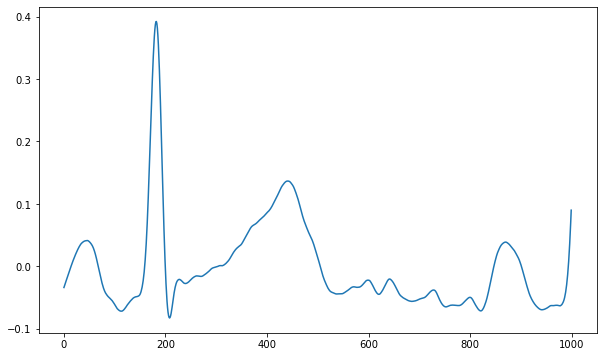

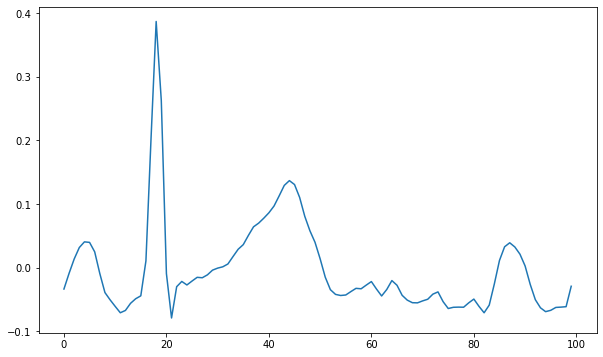

In [5]:
# Show sample data for 1000 Hz and 100 Hz

sample = 0
test = data_1k[sample]
test2 = data[sample]
plt.figure(1)
plt.plot(test[0:1000])
plt.figure(2)
plt.plot(test2[0:100])

# nk.ecg_intervalrelated(ecg_signals)

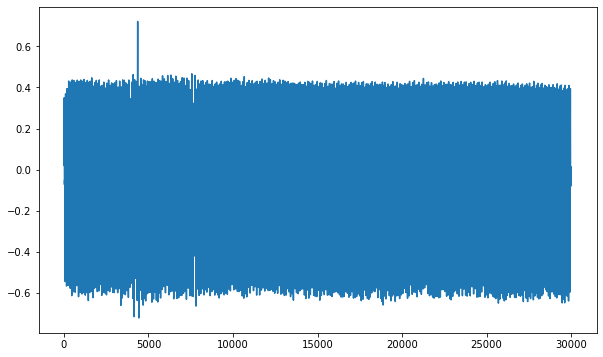

In [6]:
plt.plot(data[1])